# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [1]:
# #@title Setup (may take a few minutes)
# !git clone https://github.com/orpatashnik/StyleCLIP.git

# import os
# os.chdir(f'./StyleCLIP')

# !pip install ftfy regex tqdm
# !pip install git+https://github.com/openai/CLIP.git

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # downloads StyleGAN's weights and facial recognition network weights
# ids = ['1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT', '1N0MZSqPRJpLfP4mFQCS14ikrVSe8vQlL']
# for file_id in ids:
#   downloaded = drive.CreateFile({'id':file_id})
#   downloaded.FetchMetadata(fetch_all=True)
#   downloaded.GetContentFile(downloaded.metadata['title'])

In [3]:
import os
os.chdir("../")

import torch
from optimization.run_optimization_ti import main

In [16]:
experiment_type = 'edit' #@param ['edit', 'free_generation']

latent_path = None #@param {type:"string"}

optimization_steps = 40 #@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

id_lambda = 0.005 #@param {type:"number"}

stylespace = False #@param {type:"boolean"}

create_video = True #@param {type:"boolean"}

use_seed = True #@param {type:"boolean"}

seed = 1 #@param {type: "number"}

In [30]:
#@title Additional Arguments
args = {
    "device": torch.device("cuda:0"),
#     "device": torch.device("cuda:1"),
    
    "img_description": "./optimization/tan_red.jpg",
    "attr": "skin",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "ir_se50_weights": "pretrained_models/model_ir_se50.pth",
    "ckpt": "pretrained_models/stylegan2-ffhq-config-f.pt",
    
}

In [31]:
from argparse import Namespace
Namespace(**args)

Namespace(attr='skin', ckpt='pretrained_models/stylegan2-ffhq-config-f.pt', device=device(type='cuda', index=0), id_lambda=0.02, img_description='./optimization/tan_red.jpg', ir_se50_weights='pretrained_models/model_ir_se50.pth', l2_lambda=0.008, latent_path=None, lr=0.1, lr_rampup=0.05, mode='edit', results_dir='results', save_intermediate_image_every=1, step=40, stylegan_size=1024, truncation=0.7, work_in_stylespace=False)

In [32]:
if use_seed:
    import torch
    torch.manual_seed(seed)
result = main(Namespace(**args))

Loading ResNet ArcFace


loss: 0.2403;: 100%|██████████| 40/40 [00:19<00:00,  2.07it/s]


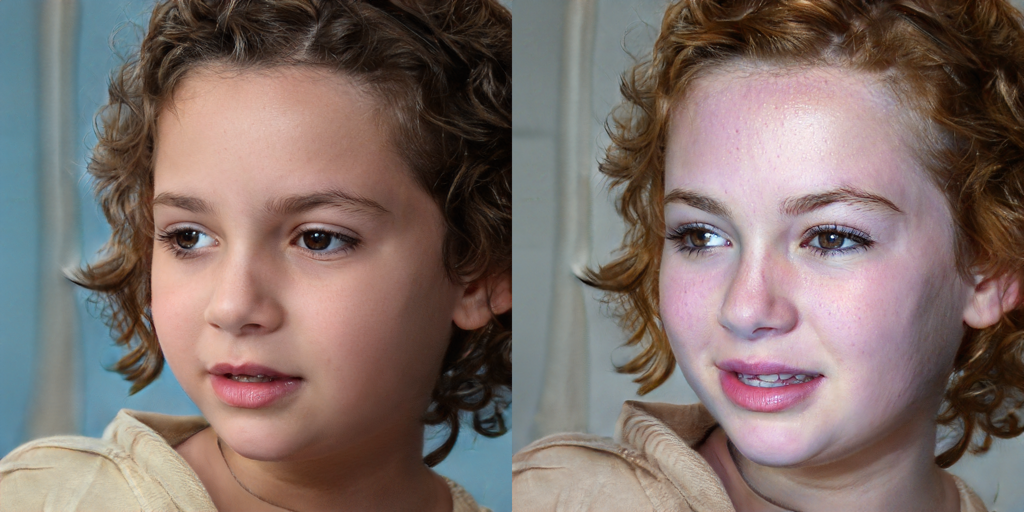

In [33]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

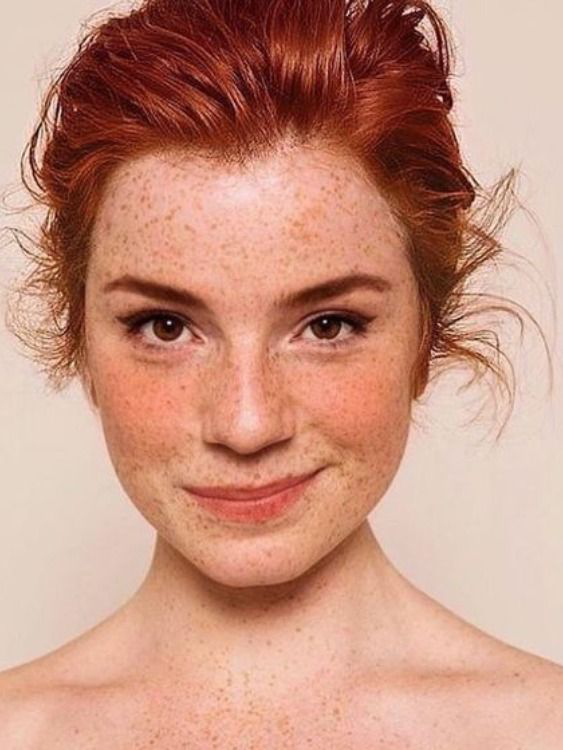

In [35]:
Image.open("optimization/tan_red.jpg")

In [10]:
!ls

cog_predict.py	   img	     models		__pycache__
cog.yaml	   LICENSE   notebooks		README.md
criteria	   licenses  optimization	results
global_directions  mapper    pretrained_models	utils.py


In [11]:
# #@title Create and Download Video

# !ffmpeg -r 15 -i results/%05d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4
# from google.colab import files
# files.download('out.mp4')